<a href="https://colab.research.google.com/github/pahwa1902/LearMachineLearning/blob/master/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
tf.executing_eagerly()
tf.random.set_seed(512)

In [3]:
! git clone https://github.com/pahwa1902/SpamDetection.git

Cloning into 'SpamDetection'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [0]:
!cd SpamDetection

In [5]:
!ls SpamDetection

spam.csv


In [32]:
data_spam = pd.read_csv('SpamDetection/spam.csv',encoding='latin-1')
data_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
data_spam_detection = pd.DataFrame({'Type':data_spam['v1'],'Email':data_spam['v2']})
data_spam_detection.head()

,Type,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
label = data_spam.pop('v1')
spam_label = []
for i in range(len(label)):
  if(label[i]=='ham'):
    spam_label.append(1)
  if(label[i]=='spam'):
    spam_label.append(0)
trainlabel = spam_label[:3345]
testlabel = spam_label[3345:4445]
validatelabel = spam_label[4445:]


In [0]:
train = data_spam.pop('v2')
traindata = train[:3345]
testdata = train[3345:4445]
validatedata = train[4445:]

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((traindata,trainlabel))
test_dataset = tf.data.Dataset.from_tensor_slices((testdata,testlabel))
validate_dataset = tf.data.Dataset.from_tensor_slices((validatedata,validatelabel))

In [0]:
example_data ,example_label = next(iter(train_dataset.batch(10)))

In [0]:

train_data = train_dataset.shuffle(1000).batch(16)
test_data = test_dataset.shuffle(1000).batch(16)
validate_data = validate_dataset.batch(32)

In [0]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)


In [40]:
hub_layer(example_data[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[-0.42655703, -0.4369624 ,  0.38947412, -0.52729607, -2.5634472 ,
        -0.11791651, -1.812008  , -0.5003269 ,  0.7801439 , -0.6582062 ,
        -1.8806639 ,  1.3173735 ,  0.6331653 ,  0.21902816, -1.2752063 ,
        -0.22019728, -0.00961794,  0.8717695 , -0.71816397, -1.1814098 ],
       [-0.02057366, -0.40507334,  0.42449516,  0.46892646, -0.4980319 ,
        -0.04080986, -0.4647013 ,  0.2864666 ,  0.44804916,  0.20993288,
        -0.541347  ,  0.06294689,  0.54342836,  0.208689  , -0.29764375,
        -0.12304761,  0.1083204 ,  0.13451028, -0.1944722 , -0.41158327],
       [-2.4042654 , -0.02150405,  0.5840742 ,  0.16783147, -0.69800067,
         0.01973474, -1.1425722 , -2.3588674 , -1.6163446 ,  0.10751774,
        -1.840412  , -0.85544854,  0.946002  ,  0.27913603,  0.9670733 ,
         0.77217865,  0.41659495, -1.3109119 ,  0.01364962,  0.6320113 ]],
      dtype=float32)>

In [0]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
history = model.fit(train_data,epochs=20,validation_data=validate_data,verbose=1 )

Train for 210 steps, validate for 36 steps
Epoch 1/20
210/210 [==============================] - 2s 9ms/step - loss: 0.3309 - accuracy: 0.8685 - val_loss: 0.1857 - val_accuracy: 0.9379
Epoch 2/20
210/210 [==============================] - 1s 7ms/step - loss: 0.1627 - accuracy: 0.9519 - val_loss: 0.1296 - val_accuracy: 0.9636
Epoch 3/20
210/210 [==============================] - 1s 7ms/step - loss: 0.1160 - accuracy: 0.9689 - val_loss: 0.1066 - val_accuracy: 0.9681
Epoch 4/20
210/210 [==============================] - 1s 7ms/step - loss: 0.0850 - accuracy: 0.9764 - val_loss: 0.0941 - val_accuracy: 0.9689
Epoch 5/20
210/210 [==============================] - 1s 7ms/step - loss: 0.0625 - accuracy: 0.9836 - val_loss: 0.0848 - val_accuracy: 0.9698
Epoch 6/20
210/210 [==============================] - 2s 7ms/step - loss: 0.0468 - accuracy: 0.9880 - val_loss: 0.0782 - val_accuracy: 0.9752
Epoch 7/20
210/210 [==============================] - 1s 7ms/step - loss: 0.0343 - accuracy: 0.9904 - val

In [44]:
loss, accuracy = model.evaluate(test_data)

69/69 [==============================] - 0s 1ms/step - loss: 0.1466 - accuracy: 0.9655


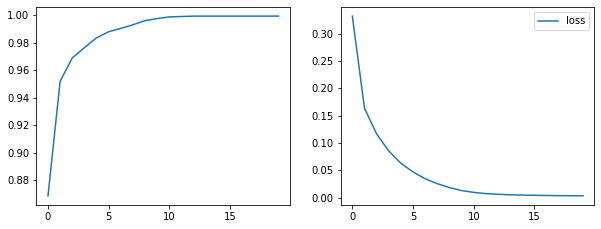

In [45]:
acc = history.history['accuracy']
loss = history.history['loss']
epoch = range(20)
plt.figure(figsize=(10,8))
ax1 = plt.subplot(2,2,1)
ax1.plot(epoch,acc,label='Accuracy')
ax2 = plt.subplot(2,2,2)
ax2.plot(epoch,loss,label='loss')
plt.legend()

In [46]:
model.predict(example_data)

array([[1.0000000e+00],
       [9.9348819e-01],
       [8.4312103e-07],
       [9.9999976e-01],
       [1.0000000e+00],
       [1.8625345e-02],
       [9.9999988e-01],
       [9.9898881e-01],
       [1.4717118e-06],
       [9.8927387e-08]], dtype=float32)

In [47]:

data_spam_detection['Email'].astype(str)
a=''
for i in range(len(data_spam_detection)):
  a = a+data_spam_detection['Email'].iloc[i]

print(i)

5571


In [56]:
tokenizer = tfds.features.text.Tokenizer()
vocab_set = set()
for text_tensor,text_label in train_dataset:
  token = tokenizer.tokenize(text_tensor.numpy())
  vocab_set.update(token)
vocab_len = len(vocab_set)
print(vocab_len)

8248


In [0]:
encoder = tfds.features.text.TokenTextEncoder(vocab_set)

In [0]:
def encode(data,label):
  encoded_data = encoder.encode(data.numpy())
  return encoded_data, label

In [0]:
def encode_fn(text,label):
  return tf.py_function(encode,inp=[text,label],Tout=(tf.int64,tf.int64))

train_dataset = train_dataset.map(encode_fn)
validate_dataset = validate_dataset.map(encode_fn)

In [0]:
train_data_new = train_dataset.shuffle(1000).batch(16)
val_data_new = validate_dataset.batch(32)

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(train_data_new,epochs=20,validation_data=val_data_new)